In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = "darkgrid")
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import cm
from fbprophet import Prophet



ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


# Data Loading

In [2]:
demand = pd.read_csv("Historical Product Demand.csv")

In [3]:
demand.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


# Data Cleaning

In [4]:
demand.isnull().any()

Product_Code        False
Warehouse           False
Product_Category    False
Date                 True
Order_Demand        False
dtype: bool

Date contains null data

In [5]:
demand.dropna(inplace=True)

In [6]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1037336 non-null object
Warehouse           1037336 non-null object
Product_Category    1037336 non-null object
Date                1037336 non-null object
Order_Demand        1037336 non-null object
dtypes: object(5)
memory usage: 47.5+ MB


# Data Exploration

In [7]:
demand['Product_Category'].nunique()

33

Total 33 different category for products

Text(0, 0.5, 'Number of Product_Code')

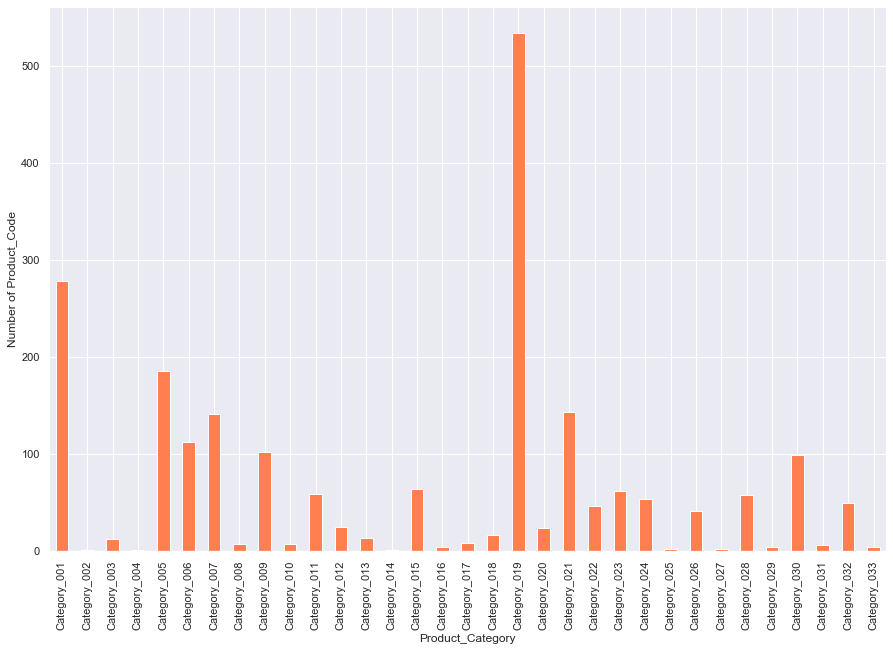

In [8]:
ax=demand.groupby('Product_Category')['Product_Code'].nunique().plot(kind='bar',
                                    figsize=(15,10), color='coral')
ax.set_ylabel("Number of Product_Code")

The above figure show the number of different tpyes of product in each category. Category_019 contains over 500 types of product.

In [9]:
demand['Order_Demand'] = pd.to_numeric(demand['Order_Demand'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ))

Transform the 'Order_Demand' into numerical numbers

Text(0, 0.5, 'Demand')

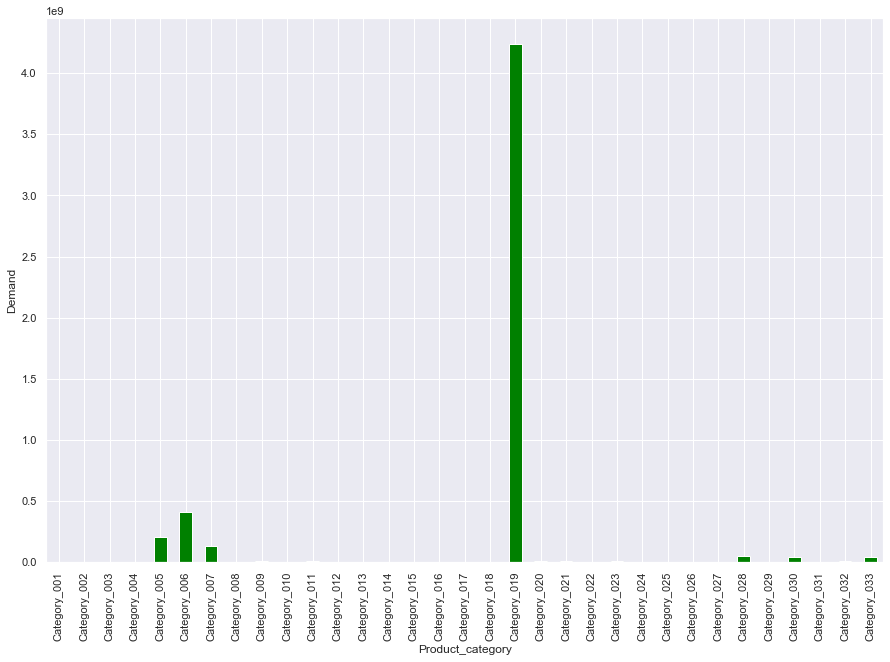

In [11]:
ax = demand.groupby('Product_Category')['Order_Demand'].sum().plot(kind='bar',figsize=(15,10), color='green')
ax.set_xlabel("Product_category")
ax.set_ylabel("Demand")

Category_019 has the largest demand.

In [12]:
demand.groupby('Product_Category')['Order_Demand'].sum()

Product_Category
Category_001       1757473
Category_002           628
Category_003        392950
Category_004         99046
Category_005     199674520
Category_006     405571330
Category_007     128691531
Category_008         17568
Category_009       3782141
Category_010         22554
Category_011       2892842
Category_012         70006
Category_013        309618
Category_014           100
Category_015        834505
Category_016         16850
Category_017         49457
Category_018         46023
Category_019    4240159257
Category_020       2393813
Category_021       4480570
Category_022        606051
Category_023       3337724
Category_024       1057317
Category_025        486000
Category_026        281996
Category_027           103
Category_028      49055354
Category_029         23979
Category_030      40966555
Category_031         13022
Category_032       4473048
Category_033      42610000
Name: Order_Demand, dtype: int64

# Product Forecasting

We choose the rows contain 'Category_019' as the training testing data set. 

In [95]:
demand_category_019 = demand.loc[demand['Product_Category'] == 'Category_019'].sort_values(['Date'],ascending=False)


In [96]:
demand_category_019.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
863020,Product_1904,Whse_C,Category_019,2017/1/9,4000
921360,Product_1241,Whse_J,Category_019,2017/1/6,20000
921345,Product_1316,Whse_J,Category_019,2017/1/6,10000
921328,Product_1359,Whse_J,Category_019,2017/1/6,100000
921329,Product_1453,Whse_J,Category_019,2017/1/6,8000
921375,Product_1274,Whse_J,Category_019,2017/1/6,20000
921384,Product_1316,Whse_J,Category_019,2017/1/6,10000
880028,Product_1408,Whse_J,Category_019,2017/1/6,1000
972876,Product_1351,Whse_J,Category_019,2017/1/5,2000
921379,Product_1288,Whse_J,Category_019,2017/1/5,1000


In [97]:
demand_category_019 = demand_category_019.drop(['Product_Code','Warehouse','Product_Category'],axis=1)
demand_category_019=pd.DataFrame(demand_category_019)

In [98]:
demand_category_019.head()

,Date,Order_Demand
863020,2017/1/9,4000
921360,2017/1/6,20000
921345,2017/1/6,10000
921328,2017/1/6,100000
921329,2017/1/6,8000


In [99]:
demand_category_019.loc[:,'Date'] = pd.to_datetime(demand_category_019.loc[:,'Date'], format="%Y/%m/%d")

In [100]:
demand_category_019.head()

,Date,Order_Demand
863020,2017-01-09,4000
921360,2017-01-06,20000
921345,2017-01-06,10000
921328,2017-01-06,100000
921329,2017-01-06,8000


Converting date into datetimeindex format

In [101]:
demand_category_019 = demand_category_019.set_index('Date')

This transforms the index of your dataframe into a DatetimeIndex, which gives pandas the capability to interpret this dataset as a Time Series.

In [102]:
demand_category_019 = demand_category_019.resample('M').sum()
demand_category_019.head()

,Order_Demand
Date,
2011-06-30,92000
2011-07-31,0
2011-08-31,0
2011-09-30,1250
2011-10-31,3


In [103]:
demand_category_019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2011-06-30 to 2017-01-31
Freq: M
Data columns (total 1 columns):
Order_Demand    68 non-null int64
dtypes: int64(1)
memory usage: 1.1 KB


In [104]:
demand_category_019=demand_category_019[~demand_category_019['Order_Demand'].isin([0])]


Delete the rows containing 0

In [105]:
demand_category_019

,Order_Demand
Date,
2011-06-30,92000
2011-09-30,1250
2011-10-31,3
2011-11-30,57250
2011-12-31,6376792
2012-01-31,61243661
2012-02-29,72219508
2012-03-31,72444888
2012-04-30,61382420


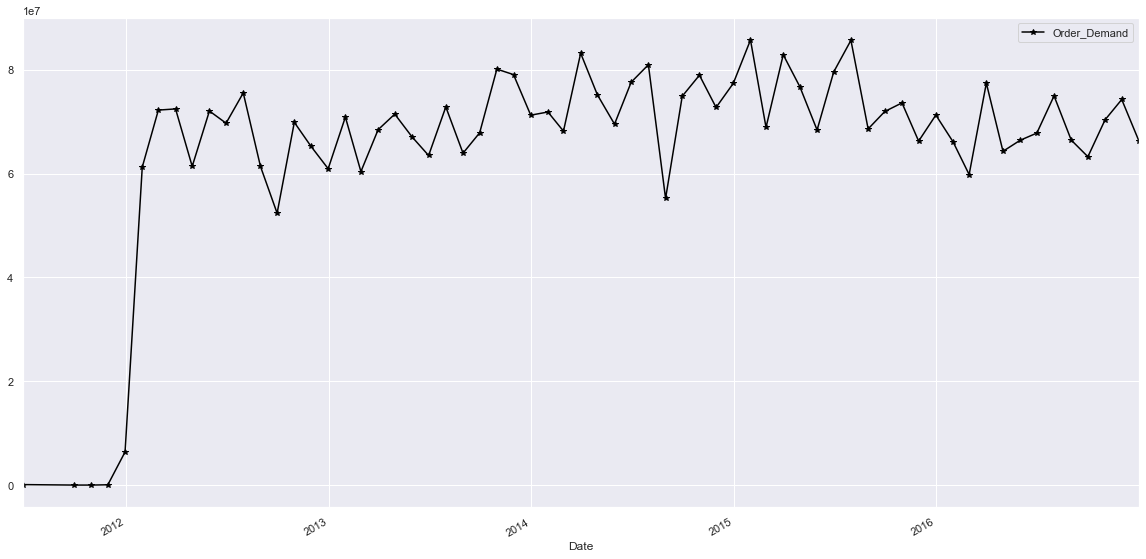

In [110]:
demand_category_019=demand_category_019[0:65]
#Plotting time series for this product
demand_category_019.plot(figsize=(20,10),color='black',marker='*')


Removing the last row, which seems to be anomaly. The above figure shows the demand for each month from 2011 to 2016

In [111]:
forecast = demand_category_019
forecast = forecast.rename(columns={ 'Order_Demand': "y" })
forecast.reset_index(level=0, inplace=True)
forecast = forecast.rename(columns={ 'Date': "ds" })

In [112]:
from scipy.stats import boxcox
forecast['y'], lam = boxcox(forecast['y'])

model = Prophet()
model.fit(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Box-Cox Transforms are data transformations that evaluate a set of lambda coefficients (λ) and selects the value that achieves the best approximation of normality.


In [119]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
84,2018-08-31
85,2018-09-30
86,2018-10-31
87,2018-11-30
88,2018-12-31


In [121]:
#predicting the future model
forecast = model.predict(future)
forecast_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


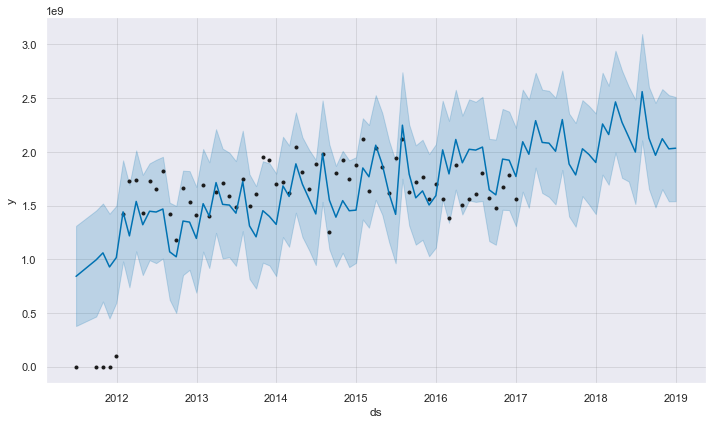

In [123]:
model.plot(forecast_data);

The overall trend is increasing as the time going by. This prediction seems to to quite reliable.